In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install --upgrade pip
!pip install --upgrade setuptools wheel
!pip install --upgrade "mxnet<2.0.0"
!pip install pydeseq2
!pip install adjustText
!pip install scanpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.5/819.5 kB 10.9 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 17.2 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 4.2 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=26a2e3ad43a6851310940d53d47be388123124e60564ced9d77c7dee868488ec
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8027 sha256=8

In [3]:
import pandas as pd
from pathlib import Path

DATA = Path("/content/drive/My Drive/F23/ECBME4060/data/project")


#Mutual Exclusivity Analysis

# Binary Matrix Construction

In [5]:

import pandas as pd
import scanpy as sc

# Import the data
datamutations = pd.read_csv(DATA / "data_mutationslaml.txt", sep='\t')

# Get unique patients and genes
patients = datamutations['Tumor_Sample_Barcode'].unique()[0:]
numpatients = len(patients)
genes = datamutations['Hugo_Symbol'].unique()[0:]
numgenes = len(genes)

# Create a binary matrix
binarymatrix = pd.DataFrame(0, index=patients, columns=genes)

# Populate the binary matrix
for i in range(1, len(datamutations)):
    gene = datamutations.loc[i, 'Hugo_Symbol']
    patient = datamutations.loc[i, 'Tumor_Sample_Barcode']

    if gene in genes and patient in patients:
        binarymatrix.loc[patient, gene] = 1

<ipython-input-5-aeb6c43c5653>:5: DtypeWarning: Columns (33,34,35,36,45) have mixed types. Specify dtype option on import or set low_memory=False.
  datamutations = pd.read_csv(DATA / "data_mutationslaml.txt", sep='\t')


In [6]:
binarymatrix.head()

,TBX15,TCHHL1,DNMT3A,IDH1,GRM7,ANKRD30A,KRT74,PTPN11,EP400,RP11-815J4.6,...,ACAA1,POLR2B,CDKL3,ERBB2IP,PLAA,APOOL,PCSK2,C4orf29,CLEC7A,CALCR
TCGA-AB-2802-03,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
TCGA-AB-2803-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-AB-2804-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-AB-2805-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-AB-2806-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
print(binarymatrix.shape)

(199, 6427)


In [8]:
pip install numpy scipy statsmodels

# Differential Expression Analysis

In [9]:
import pandas as pd

counts = pd.read_csv(DATA / "tcga_laml_raw_count.txt")

In [10]:
counts

,TCGA-AB-2872-03A-01T-0735-13,TCGA-AB-2990-03B-01T-0748-13,TCGA-AB-2825-03A-01T-0736-13,TCGA-AB-2812-03A-01T-0734-13,TCGA-AB-2838-03A-01T-0736-13,TCGA-AB-2948-03A-01T-0740-13,TCGA-AB-2849-03A-01T-0734-13,TCGA-AB-2943-03A-01T-0740-13,TCGA-AB-2952-03B-01T-0760-13,TCGA-AB-2896-03B-01T-0751-13,...,TCGA-AB-2921-03A-01T-0740-13,TCGA-AB-3011-03A-01T-0736-13,TCGA-AB-2885-03A-01T-0735-13,TCGA-AB-2985-03A-01T-0734-13,TCGA-AB-2929-03A-01T-0735-13,TCGA-AB-2978-03A-01T-0734-13,TCGA-AB-2821-03A-01T-0735-13,TCGA-AB-2897-03A-01T-0735-13,TCGA-AB-2994-03A-01T-0735-13,TCGA-AB-2975-03A-01T-0734-13
BX004987.1,0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0,0,0,0,0,0
AC145212.2,0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0,0,0,0,0,0
AC145212.1,0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0,0,0,0,0,0
Y_RNA,0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0,0,0,0,0,0
AC011043.1,0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IL9R,0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0,0,0,0,0,0
WASIR1,0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0,0,0,0,0,0
AJ271736.10,0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0,0,0,0,0,0
WASH6P,0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0,0,0,0,0,0


In [11]:
countst = counts.T
countst.head()

,BX004987.1,AC145212.2,AC145212.1,Y_RNA,AC011043.1,AC011043.2,Y_RNA,AC011841.1,KIR3DL2,KIR2DS1,...,AMD1P2,DPH3P2,VAMP7,ELOCP24,TRPC6P,IL9R,WASIR1,AJ271736.10,WASH6P,DDX11L16
TCGA-AB-2872-03A-01T-0735-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-AB-2990-03B-01T-0748-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-AB-2825-03A-01T-0736-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-AB-2812-03A-01T-0734-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-AB-2838-03A-01T-0736-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
!pip install rpy2

In [13]:
import os
import pickle as pkl

from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
from pydeseq2.utils import load_example_data

print("Binary Matrix Index:", binarymatrix.index)
print("Counts Index:", countst.index)

common_samples = binarymatrix.index.intersection(countst.index)
binarymatrix_commonsamps = binarymatrix.loc[common_samples, :]
rawcounts = countst.loc[common_samples, :]
binarymatrix_tp53=binarymatrix['TP53']
countst_index_subset = [index[:15] for index in countst.index.values]

# Filter binarymatrix_tp53 based on the index in countst
countst = countst[countst.index.str[:15].isin(binarymatrix_tp53.index)]
binarymatrix_tp53_filt = binarymatrix_tp53[binarymatrix_tp53.index.isin(countst_index_subset)]
list_data = {'Condition':[ 'Mutated TP53' if i == 1 else "Wild-Type TP53" for i in binarymatrix_tp53_filt],
                  'Patient':  [ i for i in binarymatrix_tp53_filt.index]} #fix
df_data = pd.DataFrame(list_data, index=countst.index.values.tolist()) #fix
df_data.head()

Binary Matrix Index: Index(['TCGA-AB-2802-03', 'TCGA-AB-2803-03', 'TCGA-AB-2804-03',
       'TCGA-AB-2805-03', 'TCGA-AB-2806-03', 'TCGA-AB-2807-03',
       'TCGA-AB-2808-03', 'TCGA-AB-2809-03', 'TCGA-AB-2810-03',
       'TCGA-AB-2811-03',
       ...
       'TCGA-AB-3002-03', 'TCGA-AB-3005-03', 'TCGA-AB-3006-03',
       'TCGA-AB-3007-03', 'TCGA-AB-3008-03', 'TCGA-AB-3009-03',
       'TCGA-AB-3011-03', 'TCGA-AB-3012-03', 'TCGA-AB-2815-03',
       'TCGA-AB-2944-03'],
      dtype='object', length=199)
Counts Index: Index(['TCGA-AB-2872-03A-01T-0735-13', 'TCGA-AB-2990-03B-01T-0748-13',
       'TCGA-AB-2825-03A-01T-0736-13', 'TCGA-AB-2812-03A-01T-0734-13',
       'TCGA-AB-2838-03A-01T-0736-13', 'TCGA-AB-2948-03A-01T-0740-13',
       'TCGA-AB-2849-03A-01T-0734-13', 'TCGA-AB-2943-03A-01T-0740-13',
       'TCGA-AB-2952-03B-01T-0760-13', 'TCGA-AB-2896-03B-01T-0751-13',
       ...
       'TCGA-AB-2921-03A-01T-0740-13', 'TCGA-AB-3011-03A-01T-0736-13',
       'TCGA-AB-2885-03A-01T-0735-13', 'TCGA-A

,Condition,Patient
TCGA-AB-2872-03A-01T-0735-13,Wild-Type TP53,TCGA-AB-2803-03
TCGA-AB-2990-03B-01T-0748-13,Wild-Type TP53,TCGA-AB-2805-03
TCGA-AB-2825-03A-01T-0736-13,Wild-Type TP53,TCGA-AB-2806-03
TCGA-AB-2812-03A-01T-0734-13,Wild-Type TP53,TCGA-AB-2807-03
TCGA-AB-2838-03A-01T-0736-13,Wild-Type TP53,TCGA-AB-2808-03


In [14]:
duplicate_indices = countst[countst.index.duplicated(keep=False)].index
print("Duplicate Indices:", duplicate_indices)
# Option 1: Drop duplicates
countst = countst[~countst.index.duplicated(keep='first')]
countst_filtered = countst[countst.sum(axis=1) >= 1]

Duplicate Indices: Index([], dtype='object')


In [15]:
df_data = df_data[~df_data.index.duplicated(keep='first')]
countst_filtered = countst_filtered[~countst_filtered.index.duplicated(keep='first')]
countst_filtered = countst_filtered.loc[:, ~countst_filtered.columns.duplicated()]


In [16]:
df_data.shape


(177, 2)

In [17]:
countst_filtered.shape

(177, 56937)

In [18]:
dds = DeseqDataSet(
    counts=countst_filtered,
    metadata=df_data,
    design_factors="Condition",
    refit_cooks=True,
   # n_cpus=1,
)

In [19]:
dds.obs_names_make_unique


<bound method AnnData.obs_names_make_unique of AnnData object with n_obs × n_vars = 177 × 56937
    obs: 'Condition', 'Patient'
    obsm: 'design_matrix'>

In [20]:
dds.var_names_make_unique

<bound method AnnData.var_names_make_unique of AnnData object with n_obs × n_vars = 177 × 56937
    obs: 'Condition', 'Patient'
    obsm: 'design_matrix'>

In [21]:
dds.deseq2()

Fitting size factors...
... done in 0.70 seconds.

Fitting dispersions...
... done in 159.88 seconds.

Fitting dispersion trend curve...
... done in 4.82 seconds.

Fitting MAP dispersions...
... done in 171.26 seconds.

Fitting LFCs...
... done in 144.03 seconds.

Refitting 15712 outliers.

Fitting dispersions...
... done in 33.09 seconds.

Fitting MAP dispersions...
... done in 31.54 seconds.

Fitting LFCs...
... done in 56.37 seconds.

/usr/local/lib/python3.10/dist-packages/pydeseq2/dds.py:1019: ImplicitModificationWarning: Setting element `.varm['_normed_means']` of view, initializing view as actual.
  self[:, self.new_all_zeroes_genes].varm["_normed_means"] = np.zeros(
/usr/local/lib/python3.10/dist-packages/pydeseq2/dds.py:1022: ImplicitModificationWarning: Setting element `.varm['LFC']` of view, initializing view as actual.
  self[:, self.new_all_zeroes_genes].varm["LFC"] = np.zeros(


In [22]:
dds.calculate_cooks()
dds.refit()

Refitting 15712 outliers.

Fitting dispersions...
... done in 31.92 seconds.

Fitting MAP dispersions...
... done in 30.28 seconds.

Fitting LFCs...
... done in 60.01 seconds.

/usr/local/lib/python3.10/dist-packages/pydeseq2/dds.py:1019: ImplicitModificationWarning: Setting element `.varm['_normed_means']` of view, initializing view as actual.
  self[:, self.new_all_zeroes_genes].varm["_normed_means"] = np.zeros(
/usr/local/lib/python3.10/dist-packages/pydeseq2/dds.py:1022: ImplicitModificationWarning: Setting element `.varm['LFC']` of view, initializing view as actual.
  self[:, self.new_all_zeroes_genes].varm["LFC"] = np.zeros(


In [45]:
stat_res = DeseqStats(dds, alpha=0.05)
stat_res.run_wald_test()
stat_res._p_value_adjustment()

Running Wald tests...
... done in 27.10 seconds.



In [46]:
df_results=stat_res.summary()

Log2 fold change & Wald test p-value: Condition Wild-Type TP53 vs Mutated TP53
              baseMean  log2FoldChange     lfcSE      stat    pvalue  padj
BX004987.1    0.000000             NaN       NaN       NaN       NaN   NaN
AC145212.2    0.000000             NaN       NaN       NaN       NaN   NaN
AC145212.1    0.000000             NaN       NaN       NaN       NaN   NaN
Y_RNA         0.000000             NaN       NaN       NaN       NaN   NaN
AC011043.1    0.000000             NaN       NaN       NaN       NaN   NaN
...                ...             ...       ...       ...       ...   ...
CYCSP49       0.275554        0.939597  5.256789  0.178740  0.858142   1.0
TPTE2P4      69.188551        0.148440  0.770373  0.192686  0.847205   1.0
SLC25A15P1   16.287079        0.215332  2.224455  0.096802  0.922884   1.0
FAM58CP     137.030100        0.509702  0.750744  0.678929  0.497183   1.0
PARP4P1     518.561871       -0.072951  0.619390 -0.117779  0.906243   1.0

[56937 rows x 6 colu

In [47]:
stat_res.LFC

,intercept,Condition_Wild-Type TP53_vs_Mutated TP53
BX004987.1,NaN,NaN
AC145212.2,NaN,NaN
AC145212.1,NaN,NaN
Y_RNA,NaN,NaN
AC011043.1,NaN,NaN
...,...,...
CYCSP49,-1.688742,0.651279
TPTE2P4,4.142106,0.102891
SLC25A15P1,2.652599,0.149256
FAM58CP,4.592355,0.353298


In [26]:
res_pdDF = pd.DataFrame({'lfc':stat_res.LFC['Condition_Wild-Type TP53_vs_Mutated TP53'],
                      'padj':stat_res.padj
                      })
res_pdDF.index = stat_res.LFC.index
sorted_padj = res_pdDF.sort_values(by='padj')
sorted_padj.head(10)

,lfc,padj
CTD-2006M22.2,30.000000,3.366265e-24
RNA5SP233,30.000000,8.162843e-22
SMPDL3A,2.544378,7.778655e-05
LDLRAD3,2.118910,3.604671e-04
STK33,2.225901,6.689352e-04
PKP2,2.740740,7.839507e-04
MMP8,2.585068,9.957684e-04
OR7D2,2.317245,1.131677e-03
GABRE,3.454462,1.191002e-03
MEG3,2.944232,1.225007e-03


In [27]:
sig_genes = sorted_padj[sorted_padj['padj']<=0.05]
textfile = 'sig_genes.txt'
sig_genes.to_csv(textfile, sep='\t', index=False)
sig_genes

,lfc,padj
CTD-2006M22.2,30.000000,3.366265e-24
RNA5SP233,30.000000,8.162843e-22
SMPDL3A,2.544378,7.778655e-05
LDLRAD3,2.118910,3.604671e-04
STK33,2.225901,6.689352e-04
...,...,...
RPSAP24,4.997299,4.934608e-02
LL22NC03-104C7.1,4.954091,4.934608e-02
RHBDL3,1.425166,4.934728e-02
BPI,1.573223,4.944398e-02


In [35]:
sig_genes_mut=sorted_padj[sorted_padj["lfc"]<0]
sig_genes_mut.head(10)

,lfc,padj
PCSK6,-1.136696,0.001668
CHML,-0.561810,0.002166
RP11-299G20.2,-1.144043,0.002427
ABCA6,-1.495878,0.003460
FGF7,-1.531435,0.004554
SLC38A4,-1.263317,0.005492
BMS1P10,-1.277066,0.007096
CACNA1D,-0.699177,0.008837
RP11-158G18.1,-1.340448,0.014727
RP11-474P2.6,-0.787344,0.014845


In [36]:
sig_genes_wt=sorted_padj[sorted_padj["lfc"]>0]
sig_genes_wt.head(10)

,lfc,padj
CTD-2006M22.2,30.000000,3.366265e-24
RNA5SP233,30.000000,8.162843e-22
SMPDL3A,2.544378,7.778655e-05
LDLRAD3,2.118910,3.604671e-04
STK33,2.225901,6.689352e-04
PKP2,2.740740,7.839507e-04
MMP8,2.585068,9.957684e-04
OR7D2,2.317245,1.131677e-03
GABRE,3.454462,1.191002e-03
MEG3,2.944232,1.225007e-03


# Plotting Volcano Plots

In [94]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

In [95]:
df_de = pd.DataFrame({'lfc':stat_res.LFC['Condition_Wild-Type TP53_vs_Mutated TP53'],
                      'padj':stat_res.padj.apply(lambda x:-np.log10(x))
                      })
df_de.index = stat_res.LFC.index

In [96]:
df_de_nonan = df_de[df_de.padj.notna()]
index_names_to_remove = ['CTD-2006M22.2', 'RNA5SP233']
df_de_nonan_rmtop2 = df_de_nonan.drop(index_names_to_remove, axis=0)

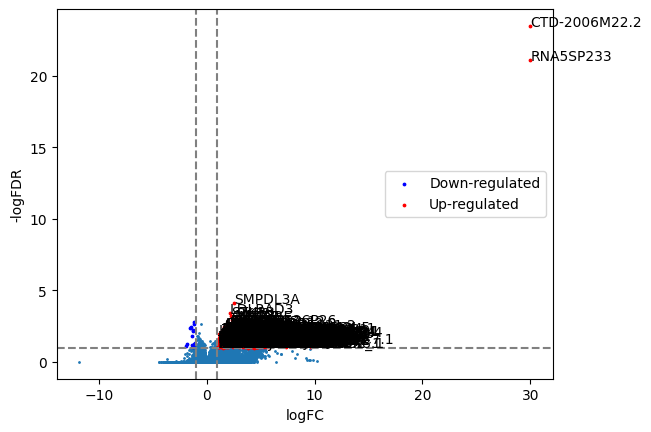

In [97]:
from adjustText import adjust_text

plt.scatter(x=df_de_nonan['lfc'], y=df_de_nonan['padj'], s=1)

# highlight down- or up- regulated genes
down = df_de_nonan[(df_de_nonan['lfc']<=-1)&(df_de_nonan['padj']>=1)]
up = df_de_nonan[(df_de_nonan['lfc']>1)&(df_de_nonan['padj']>=1)]

plt.scatter(x=down['lfc'],y=down['padj'],s=3,label="Down-regulated",color="blue")
plt.scatter(x=up['lfc'],y=up['padj'],s=3,label="Up-regulated",color="red")


texts=[]
for i,r in up.iterrows():
    texts.append(plt.text(x=r['lfc'],y=r['padj'],s=i))

plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(-1,color="grey",linestyle="--")
plt.axvline(1,color="grey",linestyle="--")
plt.axhline(1,color="grey",linestyle="--")
plt.legend()

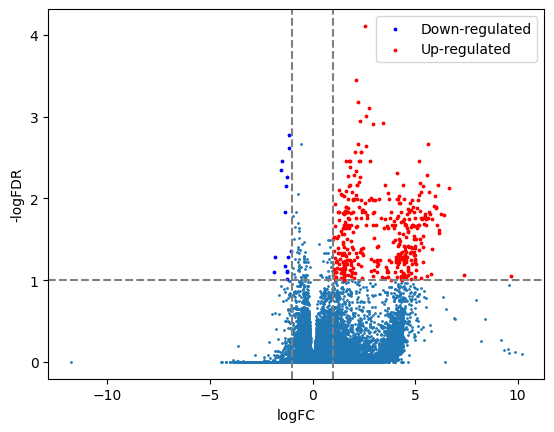

In [98]:
from adjustText import adjust_text

plt.scatter(x=df_de_nonan_rmtop2['lfc'], y=df_de_nonan_rmtop2['padj'], s=1)

# highlight down- or up- regulated genes
down = df_de_nonan_rmtop2[(df_de_nonan_rmtop2['lfc']<=-1)&(df_de_nonan_rmtop2['padj']>=1)]
up = df_de_nonan_rmtop2[(df_de_nonan_rmtop2['lfc']>1)&(df_de_nonan_rmtop2['padj']>=1)]

plt.scatter(x=down['lfc'],y=down['padj'],s=3,label="Down-regulated",color="blue")
plt.scatter(x=up['lfc'],y=up['padj'],s=3,label="Up-regulated",color="red")

plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(-1,color="grey",linestyle="--")
plt.axvline(1,color="grey",linestyle="--")
plt.axhline(1,color="grey",linestyle="--")
plt.legend()